In [1]:
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive/')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
data_set_file_path = '/content/drive/MyDrive/Intro to Machine Learning/D3.csv'
data_set = (pd.read_csv(data_set_file_path))
data_set.head

<bound method NDFrame.head of           X1        X2        X3         Y
0   0.000000  3.440000  0.440000  4.387545
1   0.040404  0.134949  0.888485  2.679650
2   0.080808  0.829899  1.336970  2.968490
3   0.121212  1.524848  1.785455  3.254065
4   0.161616  2.219798  2.233939  3.536375
..       ...       ...       ...       ...
95  3.838384  1.460202  3.046061 -4.440595
96  3.878788  2.155152  3.494545 -4.458663
97  3.919192  2.850101  3.943030 -4.479995
98  3.959596  3.545051  0.391515 -3.304593
99  4.000000  0.240000  0.840000 -5.332455

[100 rows x 4 columns]>

#Problem 1 (50 points)
#Develop a code that run linear regression with gradient decent algorithm for each of the explanatory variables in isolation.
#In this case, you assume that in each iteration, only one explanatory variable (either X1, or X2, or X3) is explaining the output. 
#Basically, you need to do three different training, one per each explanatory variable. 
#For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters to zero (theta to zero).
#Report the linear model you found for each explanatory variable.
#Plot the final regression model and loss over the iteration per each explanatory variable.
#Which explanatory variable has the lower loss (cost) for explaining the output (Y)?
#Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iteration.

In [3]:
Input = data_set.values[:, 0] #Going to utilize X1 as my input so i'll get input from first column
Output = data_set.values[:, 3] #Going to utilizie Y as my output
Training_Examples = len(Output)
print('Output = ', Output[: 5])
print('Input = ', Input[: 5])

Output =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
Input =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]


In [4]:
Input2 = data_set.values[:, 1] #Going to utilize X1 as my input so i'll get input from first column
print('Input2 = ', Input2[: 5])

Input2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]


In [5]:
Input3 = data_set.values[:, 2] #Going to utilize X1 as my input so i'll get input from first column
print('Input3 = ', Input3[: 5])

Input3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]


Text(0.5, 1.0, 'Scatter plot of X1 & Y')

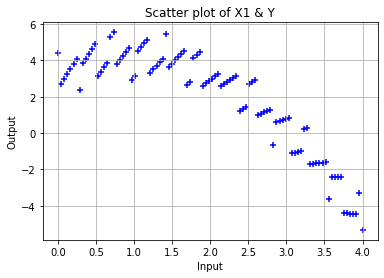

In [6]:
plt.scatter(Input,Output, color = 'blue', marker = '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Scatter plot of X1 & Y')

Text(0.5, 1.0, 'Scatter plot of X2 & Y')

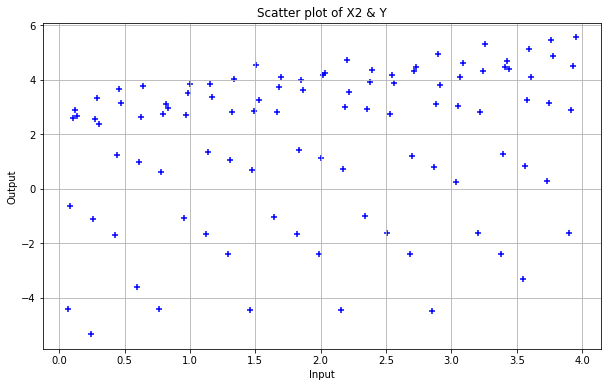

In [7]:
plt.scatter(Input2,Output, color = 'blue', marker = '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Scatter plot of X2 & Y')

Text(0.5, 1.0, 'Scatter plot of X3 & Y')

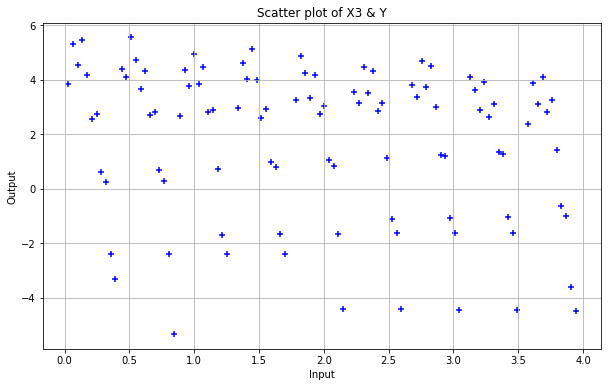

In [8]:
plt.scatter(Input3,Output, color = 'blue', marker = '+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Input')
plt.ylabel('Output')
plt.title('Scatter plot of X3 & Y')

In [9]:
#Initializing a ones matrix
onesMatrix = np.ones((Training_Examples,1))
#onesMatrix[:5]

In [10]:
#Converting array dimension from 1D to 2D
reshapedInput = Input.reshape(Training_Examples,1)
#reshapedInput[:10]

In [11]:
reshapedInput2 = Input2.reshape(Training_Examples,1)
#reshapedInput2[:10]

In [12]:
reshapedInput3 = Input3.reshape(Training_Examples,1)
#reshapedInput[:10]

In [13]:
#Initializing our feature matrix
Input = np.hstack((onesMatrix,reshapedInput))
#print(Input[:5])

In [14]:
Input2 = np.hstack((onesMatrix,reshapedInput2))
#print(Input2[:5])

In [15]:
Input3 = np.hstack((onesMatrix,reshapedInput3))
#print(Input3[:5])

In [16]:
#Initialize Theta
theta = np.zeros(2)
theta

array([0., 0.])

In [17]:
#Loss Calculation using the 
def compute_loss (Input, Output, theta):
  predictions = Input.dot(theta)
  errors = np.subtract(predictions, Output)
  sqrErrors = np.square(errors)
  J = 1 / (2 * Training_Examples) * np.sum(sqrErrors)

  return J


In [18]:
  #Loss Calculation using the above function
  Loss = compute_loss(Input,Output,theta)
  print('The loss for given values of theta_0 and theta_1 =', Loss)

The loss for given values of theta_0 and theta_1 = 5.524438459196242


In [19]:
  Loss2 = compute_loss(Input2,Output,theta)
  print('The loss for given values of theta_0 and theta_1 =', Loss2)

The loss for given values of theta_0 and theta_1 = 5.524438459196242


In [20]:
  Loss3 = compute_loss(Input3,Output,theta)
  print('The loss for given values of theta_0 and theta_1 =', Loss3)

The loss for given values of theta_0 and theta_1 = 5.524438459196242


In [21]:
#Gradient descent utilizing loss for linear regression
def gradient_descent(Input, Output, theta, alpha, iterations):
  Loss_old = np.zeros(iterations)

  for i in range(iterations):
    predictions = Input.dot(theta)
    errors = np.subtract(predictions, Output)
    sum_delta = (alpha/Training_Examples) * Input.transpose().dot(errors);
    theta = theta - sum_delta;
    Loss_old[i] = compute_loss(Input,Output,theta)
  return theta, Loss_old

In [22]:
theta = [0., 0.]
iterations = 1000;
alpha = 0.04;

theta, Loss_old = gradient_descent(Input, Output, theta, alpha, iterations)
print('Final value of theta =', theta)
print('Loss_old =', Loss_old)

Final value of theta = [ 5.92715528 -2.03802775]
Loss_old = [5.36472185 5.24211647 5.14119415 5.05316329 4.97301005 4.89787101
 4.82610696 4.75677568 4.68933182 4.62345609 4.55895805 4.49572073
 4.43366913 4.37275233 4.31293319 4.25418264 4.19647626 4.13979249
 4.08411147 4.0294145  3.97568362 3.92290146 3.87105108 3.82011593
 3.77007979 3.72092677 3.67264126 3.62520793 3.57861175 3.53283793
 3.48787196 3.44369958 3.40030678 3.3576798  3.31580514 3.2746695
 3.23425985 3.19456338 3.15556749 3.11725983 3.07962825 3.04266081
 3.0063458  2.97067169 2.93562719 2.90120117 2.86738273 2.83416113
 2.80152585 2.76946654 2.73797303 2.70703534 2.67664365 2.64678834
 2.61745993 2.58864913 2.5603468  2.53254397 2.50523182 2.47840169
 2.45204508 2.42615362 2.40071911 2.37573349 2.35118883 2.32707735
 2.3033914  2.28012348 2.2572662  2.23481233 2.21275473 2.19108642
 2.16980053 2.1488903  2.12834911 2.10817045 2.08834791 2.06887521
 2.04974618 2.03095474 2.01249495 1.99436096 1.976547   1.95904743
 1.

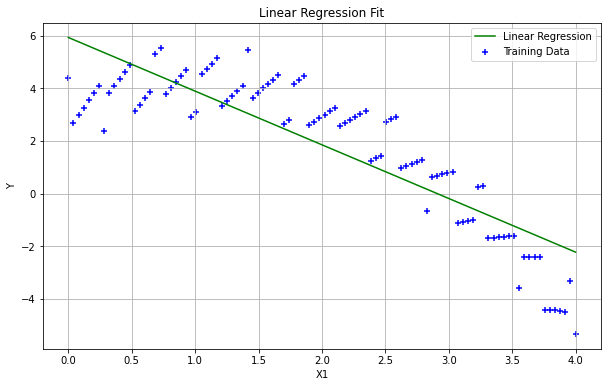

In [23]:
plt.scatter(Input[:,1], Output, color = 'blue', marker = '+', label = 'Training Data')
plt.plot(Input[:,1], Input.dot(theta), color = 'green', label = 'Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

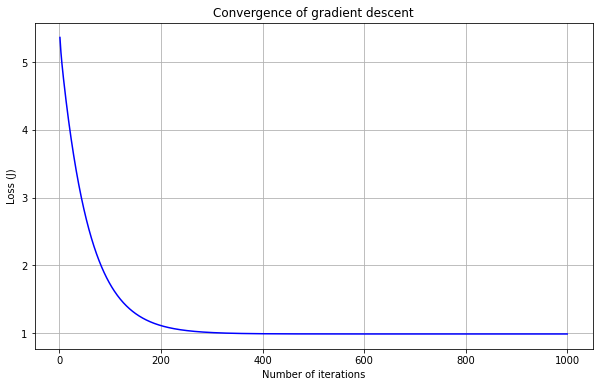

In [24]:
plt.plot(range(1,iterations + 1), Loss_old, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

In [25]:
theta = [0., 0.]
iterations = 500;
alpha = 0.01;

theta, Loss_old = gradient_descent(Input2, Output, theta, alpha, iterations)
print('Final value of theta =', theta)
print('Loss_old =', Loss_old)

Final value of theta = [0.5873825  0.61547444]
Loss_old = [5.29831663 5.09909109 4.92356115 4.76890697 4.63264432 4.51258457
 4.40679959 4.31359066 4.23146123 4.15909287 4.09532401 4.03913134
 3.98961331 3.94597567 3.90751868 3.87362588 3.84375417 3.81742507
 3.79421705 3.77375874 3.75572297 3.73982151 3.72580041 3.71343596
 3.70253105 3.69291206 3.684426   3.6769381  3.67032963 3.66449599
 3.65934501 3.65479551 3.65077597 3.64722336 3.64408217 3.64130349
 3.63884423 3.63666642 3.63473663 3.63302538 3.63150672 3.63015778
 3.62895841 3.62789085 3.62693948 3.62609051 3.6253318  3.62465266
 3.62404367 3.62349652 3.62300392 3.6225594  3.6221573  3.62179261
 3.62146092 3.62115837 3.62088152 3.62062736 3.62039324 3.62017681
 3.61997602 3.61978905 3.61961431 3.61945037 3.619296   3.6191501
 3.61901172 3.61887999 3.61875417 3.61863361 3.61851771 3.61840596
 3.61829792 3.61819319 3.6180914  3.61799227 3.6178955  3.61780087
 3.61770816 3.61761718 3.61752776 3.61743977 3.61735307 3.61726755
 3.61

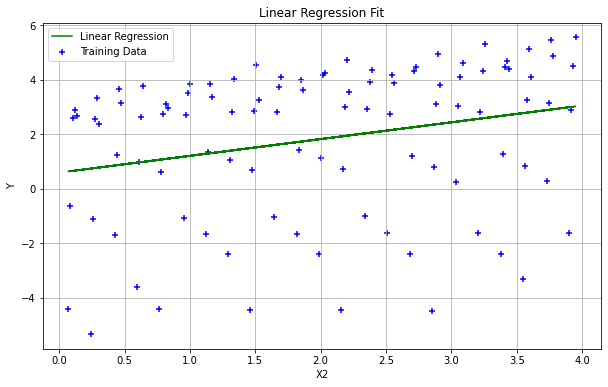

In [26]:
plt.scatter(Input2[:,1], Output, color = 'blue', marker = '+', label = 'Training Data')
plt.plot(Input2[:,1], Input2.dot(theta), color = 'green', label = 'Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X2')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

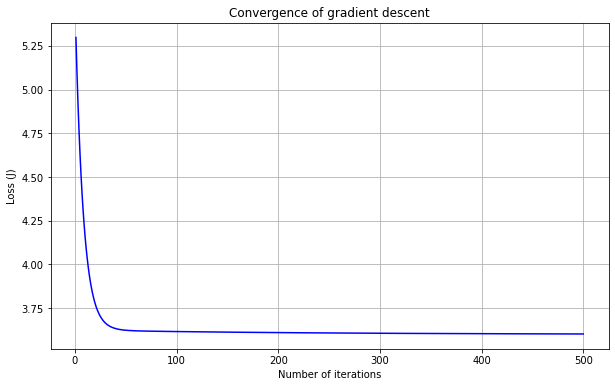

In [27]:
plt.plot(range(1,iterations + 1), Loss_old, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

In [28]:
theta = [0., 0.]
iterations = 1000;
alpha = 0.03;

theta, Loss_old = gradient_descent(Input3, Output, theta, alpha, iterations)
print('Final value of theta =', theta)
print('Loss_old =', Loss_old)

Final value of theta = [ 2.86836127 -0.51927234]
Loss_old = [5.19495378 4.96883046 4.81248407 4.70325869 4.62587049 4.57000872
 4.5287173  4.49730321 4.47259998 4.45247094 4.43547413 4.42063619
 4.40729991 4.39502134 4.38350042 4.3725341  4.36198487 4.35175936
 4.34179403 4.33204545 4.32248376 4.31308829 4.30384455 4.29474223
 4.28577384 4.27693382 4.26821791 4.25962274 4.25114551 4.24278387
 4.23453574 4.22639923 4.21837261 4.21045424 4.20264255 4.19493603
 4.18733323 4.17983271 4.17243308 4.16513296 4.15793101 4.1508259
 4.14381632 4.13690099 4.13007863 4.123348   4.11670786 4.110157
 4.10369421 4.0973183  4.09102812 4.08482251 4.07870032 4.07266045
 4.06670178 4.06082322 4.05502369 4.04930213 4.0436575  4.03808875
 4.03259487 4.02717486 4.02182771 4.01655246 4.01134812 4.00621375
 4.00114842 3.99615118 3.99122113 3.98635736 3.98155897 3.9768251
 3.97215488 3.96754744 3.96300195 3.95851757 3.95409347 3.94972886
 3.94542293 3.94117488 3.93698395 3.93284937 3.92877037 3.92474621
 3.920

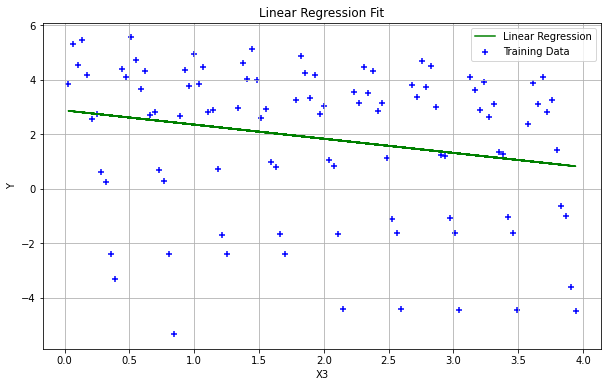

In [29]:
plt.scatter(Input3[:,1], Output, color = 'blue', marker = '+', label = 'Training Data')
plt.plot(Input3[:,1], Input3.dot(theta), color = 'green', label = 'Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('X3')
plt.ylabel('Y')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

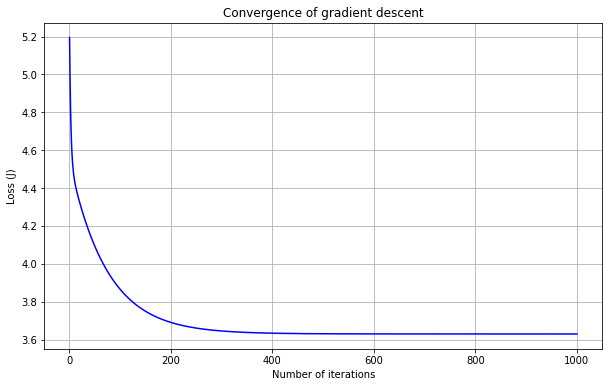

In [30]:
plt.plot(range(1,iterations + 1), Loss_old, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

#Problem 2 (50 points)
#This time, run linear regression with gradient descent algorithm using all three explanatory variables. 
#For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (theta to zero).
#Report the final linear model you found the best. 
#Plot loss over the iteration.
#Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iteration.
#Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)

In [31]:
data_set_edited = pd.read_csv(data_set_file_path)
data_set_edited.head()

data_set_edited = pd.concat([pd.Series(1, index=data_set_edited.index, name='00'), data_set_edited], axis=1)
data_set_edited.head()

,00,X1,X2,X3,Y
0,1,0.000000,3.440000,0.440000,4.387545
1,1,0.040404,0.134949,0.888485,2.679650
2,1,0.080808,0.829899,1.336970,2.968490
3,1,0.121212,1.524848,1.785455,3.254065
4,1,0.161616,2.219798,2.233939,3.536375


In [32]:
data_set_edited.shape

(100, 5)

In [33]:
Input_Edited = data_set_edited.drop(columns ='Y')
Input_Edited.head()
Output_Edited = data_set_edited.iloc[:,4]

In [34]:
theta_edited = np.array([0]*len(Input_Edited.columns))

In [35]:
Loss_Edited = compute_loss(Input_Edited,Output_Edited,theta_edited)
print('The loss for given values of theta_0 and theta_1 =', Loss_Edited)

The loss for given values of theta_0 and theta_1 = 5.524438459196242


In [36]:
theta_edited = [0., 0.,0.,0.]
iterations = 1000;
alpha = 0.025;

theta_edited, Loss_old = gradient_descent(Input_Edited, Output_Edited, theta_edited, alpha, iterations)
print('Final value of theta =', theta_edited)
print('Loss_old =', Loss_old)


Final value of theta = 00    5.191196
X1   -1.986348
X2    0.552884
X3   -0.247577
dtype: float64
Loss_old = [4.82258027 4.44307592 4.20358607 ... 0.73927784 0.73927379 0.73926976]


Text(0.5, 1.0, 'Convergence of gradient descent')

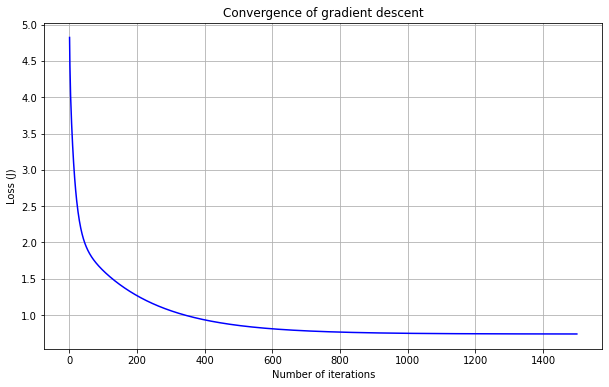

In [37]:
plt.plot(range(1,iterations + 1), Loss_old, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Loss (J)')
plt.title('Convergence of gradient descent')

In [38]:
data = {'x1' : [1,1,1], 'x2' : [2,0,4], 'x3' : [3,2,1]}
newDf = pd.DataFrame(data)
newDf =  pd.concat([pd.Series(1, index=newDf.index, name='x0'), newDf], axis=1)
newDf.head()
newDf = newDf.to_numpy()
theta_edited = theta_edited.to_numpy()


In [39]:
def hypo(theta_edited, newDf):
  hypo = newDf.dot(theta_edited)
  return hypo

In [40]:
y_hat = hypo(theta_edited, newDf)
print("Predicted Value = ", y_hat)

Predicted Value =  [3.56788518 2.7096948  5.16880589]
